## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Importing Dataset

In [2]:
os.chdir('E:\Capstone\Car_dekho')
df = pd.read_csv('data.csv')


print(df.info())
print(df.isna().sum())
print(df.head())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB
None
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner            

In [3]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [4]:
df.nunique()

name             2058
year               29
selling_price     677
km_driven         921
fuel                4
seller_type         3
transmission        2
owner               5
mileage           393
engine            121
max_power         322
torque            441
seats               9
dtype: int64

In [5]:
df = df.dropna()
df.shape

(7906, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   object 
 9   engine         7906 non-null   object 
 10  max_power      7906 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7906 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 864.7+ KB


In [7]:
#Splitting company name from CarName column
CompanyName = df['name'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)
df.drop(['name'],axis=1,inplace=True)
df.head()

,year,selling_price,CompanyName,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,450000,Maruti,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,2014,370000,Skoda,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,2006,158000,Honda,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,2010,225000,Hyundai,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,2007,130000,Maruti,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [8]:
df.CompanyName.unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [9]:
df.columns

Index(['year', 'selling_price', 'CompanyName', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner', 'mileage', 'engine',
       'max_power', 'torque', 'seats'],
      dtype='object')

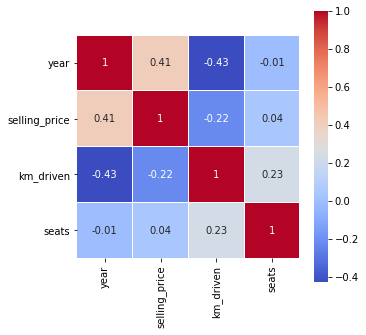

In [10]:
plt.figure(figsize=(5,5))
sns.heatmap(data=df.corr().round(2),annot=True,cmap='coolwarm',linewidths=0.2,square=True)

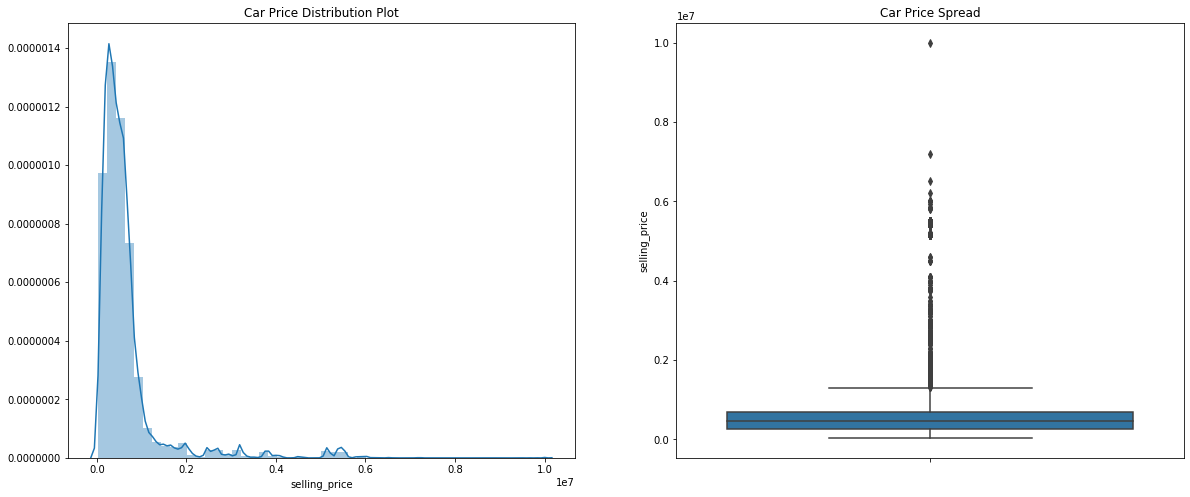

In [11]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df.selling_price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.selling_price)

plt.show()

In [12]:
print(df.selling_price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    7.906000e+03
mean     6.498137e+05
std      8.135827e+05
min      2.999900e+04
25%      2.700000e+05
50%      4.500000e+05
75%      6.900000e+05
85%      8.500000e+05
90%      1.050000e+06
100%     1.000000e+07
max      1.000000e+07
Name: selling_price, dtype: float64


## Visualising Categorical Data

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

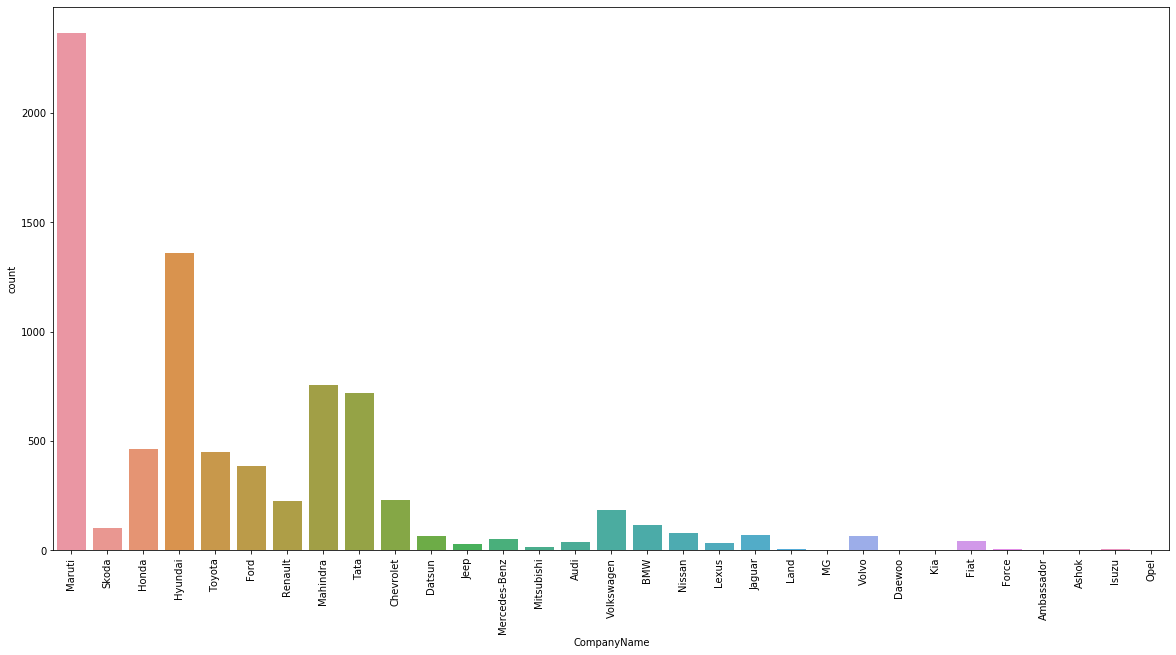

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'CompanyName',data=df)
plt.xticks(rotation=90)


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

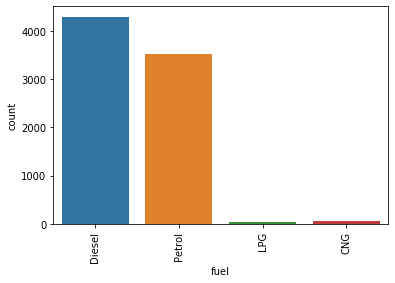

In [14]:
sns.countplot('fuel',data=df)
plt.xticks(rotation=90)


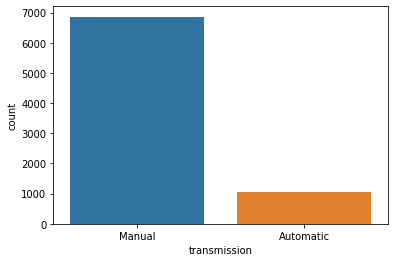

In [15]:
sns.countplot('transmission',data=df)

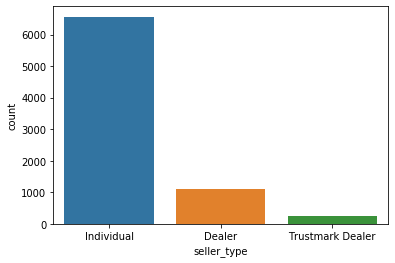

In [16]:
sns.countplot('seller_type',data=df)

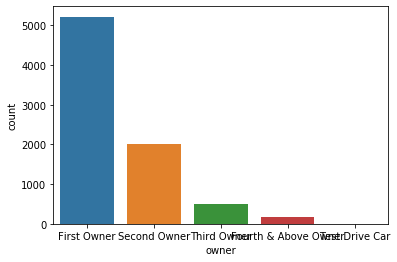

In [17]:
sns.countplot('owner',data=df)

In [18]:
# Inference :
# 1.Maruti seemed to be favored car company.
# 2.Number of diesel fueled cars are more.
# 3.manual is the top car type prefered.
# 4.more sellers are individual.
# 5.most of the owners are first owner.

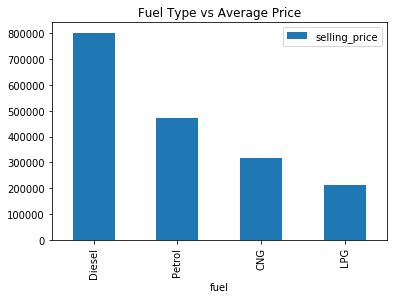

In [19]:
df1 = pd.DataFrame(df.groupby(['fuel'])['selling_price'].mean().sort_values(ascending = False))
df1.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

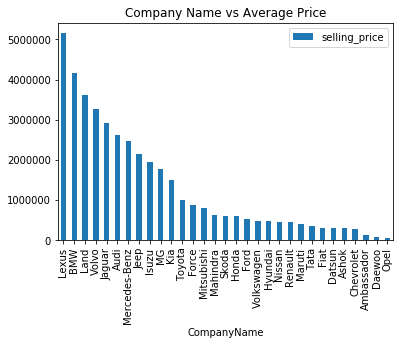

In [20]:
df2 = pd.DataFrame(df.groupby(['CompanyName'])['selling_price'].mean().sort_values(ascending = False))
df2.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

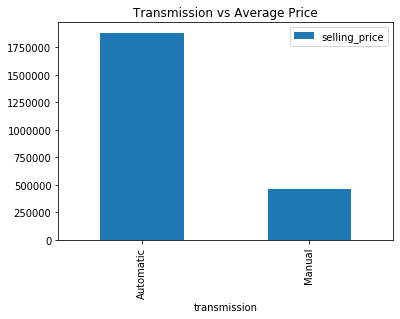

In [21]:
df3 = pd.DataFrame(df.groupby(['transmission'])['selling_price'].mean().sort_values(ascending = False))
df3.plot.bar()
plt.title('Transmission vs Average Price')
plt.show()

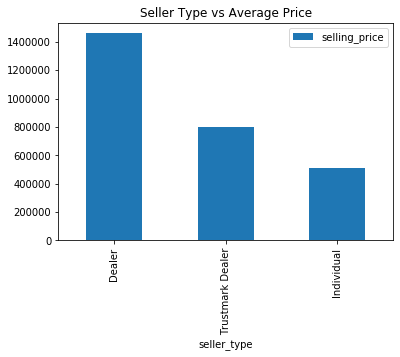

In [22]:
df4 = pd.DataFrame(df.groupby(['seller_type'])['selling_price'].mean().sort_values(ascending = False))
df4.plot.bar()
plt.title('Seller Type vs Average Price')
plt.show()

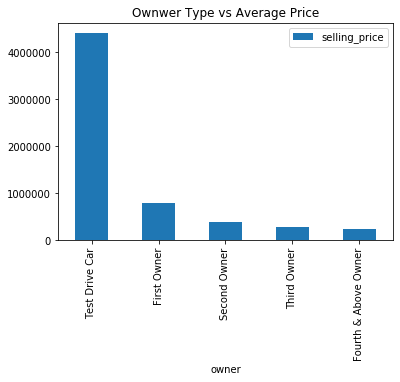

In [23]:
df5 = pd.DataFrame(df.groupby(['owner'])['selling_price'].mean().sort_values(ascending = False))
df5.plot.bar()
plt.title('Ownwer Type vs Average Price')
plt.show()

## Converting Categorical Features

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7906 non-null   int64  
 1   selling_price  7906 non-null   int64  
 2   CompanyName    7906 non-null   object 
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   object 
 9   engine         7906 non-null   object 
 10  max_power      7906 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7906 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 1.2+ MB


In [25]:
pd.get_dummies(df['seller_type'],drop_first=True).head()

,Individual,Trustmark Dealer
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [26]:
Fuel= pd.get_dummies(df['fuel'],drop_first=True)
Seller= pd.get_dummies(df['seller_type'],drop_first=True)
Transmission= pd.get_dummies(df['transmission'],drop_first=True)
Owner = pd.get_dummies(df['owner'],drop_first=True)



In [27]:
df.drop(['fuel','seller_type','transmission','owner','CompanyName','torque','max_power','engine','mileage'],axis=1,inplace=True)

In [28]:
df.head()

,year,selling_price,km_driven,seats
0,2014,450000,145500,5.0
1,2014,370000,120000,5.0
2,2006,158000,140000,5.0
3,2010,225000,127000,5.0
4,2007,130000,120000,5.0


In [29]:
df = pd.concat([df,Fuel,Seller,Transmission,Owner],axis=1)

In [30]:
df.head()

,year,selling_price,km_driven,seats,Diesel,LPG,Petrol,Individual,Trustmark Dealer,Manual,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,2014,450000,145500,5.0,1,0,0,1,0,1,0,0,0,0
1,2014,370000,120000,5.0,1,0,0,1,0,1,0,1,0,0
2,2006,158000,140000,5.0,0,0,1,1,0,1,0,0,0,1
3,2010,225000,127000,5.0,1,0,0,1,0,1,0,0,0,0
4,2007,130000,120000,5.0,0,0,1,1,0,1,0,0,0,0


## train Test Split

In [31]:
df.drop('selling_price',axis=1).head()

,year,km_driven,seats,Diesel,LPG,Petrol,Individual,Trustmark Dealer,Manual,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,2014,145500,5.0,1,0,0,1,0,1,0,0,0,0
1,2014,120000,5.0,1,0,0,1,0,1,0,1,0,0
2,2006,140000,5.0,0,0,1,1,0,1,0,0,0,1
3,2010,127000,5.0,1,0,0,1,0,1,0,0,0,0
4,2007,120000,5.0,0,0,1,1,0,1,0,0,0,0


In [32]:
df['selling_price'].head()

0    450000
1    370000
2    158000
3    225000
4    130000
Name: selling_price, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('selling_price',axis=1), 
                                                    df['selling_price'], test_size=0.30, 
                                                    random_state=101)

## Standardscaler

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
stndrd=StandardScaler()
X_train=stndrd.fit_transform(X_train)

In [37]:
X_test=stndrd.transform(X_test)

In [38]:
X_train

array([[ 1.30235761, -1.0073827 , -0.4284152 , ..., -0.5855578 ,
        -0.02689474, -0.26573158],
       [ 0.26545555, -0.32276549, -0.4284152 , ..., -0.5855578 ,
        -0.02689474, -0.26573158],
       [ 1.04313209,  0.17213852, -0.4284152 , ..., -0.5855578 ,
        -0.02689474, -0.26573158],
       ...,
       [-0.77144651,  0.17213852, -0.4284152 , ..., -0.5855578 ,
        -0.02689474,  3.76319596],
       [ 0.00623003, -0.22378469, -0.4284152 , ..., -0.5855578 ,
        -0.02689474, -0.26573158],
       [ 0.78390658, -0.48773349, -0.4284152 , ..., -0.5855578 ,
        -0.02689474, -0.26573158]])

In [39]:
X_test

array([[-0.512221  , -0.48773349, -1.48025626, ...,  1.70777333,
        -0.02689474, -0.26573158],
       [ 1.04313209, -0.9001535 , -0.4284152 , ..., -0.5855578 ,
        -0.02689474, -0.26573158],
       [-2.32679961,  3.80143457,  1.67526691, ..., -0.5855578 ,
        -0.02689474,  3.76319596],
       ...,
       [-1.54912306, -0.18036511, -0.4284152 , ...,  1.70777333,
        -0.02689474, -0.26573158],
       [ 0.00623003,  0.17213852, -0.4284152 , ..., -0.5855578 ,
        -0.02689474, -0.26573158],
       [-1.03067203,  0.91449453,  1.67526691, ...,  1.70777333,
        -0.02689474, -0.26573158]])

## Linear Regression

In [40]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Linear Regression

In [41]:
# model evaluation for training set

y_train_lin= lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_lin)))
r2 = r2_score(y_train, y_train_lin)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_lin = lin_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(y_test, y_test_lin)))

# r-squared score of the model
r2 = r2_score(y_test, y_test_lin)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 579611.9470874487
R2 score is 0.5052997370406638


The model performance for testing set
--------------------------------------
RMSE is 558075.0077151108
R2 score is 0.49888449585154904


## Randomforest Regression

In [42]:
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## Randomforest Regression

In [43]:
# model evaluation for training set

y_train_ran= reg.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_ran)))
r2 = r2_score(y_train, y_train_ran)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_ran = reg.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(y_test, y_test_ran)))

# r-squared score of the model
r2 = r2_score(y_test, y_test_ran)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 168792.186927961
R2 score is 0.9580461168713029


The model performance for testing set
--------------------------------------
RMSE is 317292.59608347196
R2 score is 0.8380158325678858
